In [2]:
from IPython import get_ipython
from IPython.display import display

import cv2
import numpy as np
import os
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
EPOCHS = 10
IMG_WIDTH = 32
IMG_HEIGHT = 32
NUM_CATEGORIES = 43
TEST_SIZE = 0.4

In [4]:
def main():

    # Check command-line arguments
    if len(sys.argv) not in [2, 3]:
        sys.exit("Usage: python traffic.py data_directory [model.h5]")

    # Get image arrays and labels for all image files
    images, labels = load_data(sys.argv[1])

    # Split data into training and testing sets
    labels = tf.keras.utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(
        np.array(images), np.array(labels), test_size=TEST_SIZE
    )

    # Get a compiled neural network
    model = get_model()

    # Fit model on training data
    model.fit(x_train, y_train, epochs=EPOCHS)

    # Evaluate neural network performance
    model.evaluate(x_test,  y_test, verbose=2)

    # Save model to file
    if len(sys.argv) == 3:
        filename = sys.argv[2]
        model.save(filename)
        print(f"Model saved to {filename}.")

In [5]:
# Define paths to your training and testing data directories
train_data_dir = '/content/drive/My Drive/gtsrb-small'
test_data_dir = '/content/drive/My Drive/gtsrb'

# Function to load images and labels from a directory
def load_data(data_dir):
  images = []
  labels = []
  for class_folder in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_path):
      for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
        images.append(image)
        labels.append(int(class_folder))
  return images, labels

# Load training and testing data
train_images, train_labels = load_data(train_data_dir)
test_images, test_labels = load_data(test_data_dir)

# Convert lists to NumPy arrays for easier processing
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)
train_images, train_labels = load_data(train_data_dir)
test_images, test_labels = load_data(test_data_dir)

# Convert lists to NumPy arrays for easier processing
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [6]:
data_dir = '/content/drive/My Drive/gtsrb-small'

X, y = load_data(data_dir)
X = np.array(X)/255
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

print(f'{X}, {y}')


# print(f'{images.shape}, {labels.shape}')


[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[0.2627451  0.23137255 0.19215686]
   [0.29019608 0.24705882 0.25882353]
   [0.37647059 0.50980392 0.62745098]
   ...
   [0.98431373 1.         1.        ]
   [0.98039216 1.         1.        ]
   [0.98431373 1.         1.        ]]

  [[0.26666667 0.23137255 0.19215686]
   [0.2

In [7]:
def get_model():
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
     # Access global variables IMG_WIDTH, IMG_HEIGHT, NUM_CATEGORIES
    global IMG_WIDTH, IMG_HEIGHT, NUM_CATEGORIES

    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output of the convolutional layers
    model.add(Flatten())

    # Dense layers for classing them
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(NUM_CATEGORIES, activation='softmax'))

    # compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    return model

# Get the model
model = get_model()


from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(x_train, y_train, batch_size=32)  # Adjust batch_size as needed
model = get_model()

model.fit(train_generator, epochs=EPOCHS)  # Use train_generator instead of x_train, y_train

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.4188 - loss: 2.7907
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6666 - loss: 1.1218
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8151 - loss: 0.5808
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9036 - loss: 0.2792
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9644 - loss: 0.1590
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9750 - loss: 0.1102
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9768 - loss: 0.1138
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.9808 - loss: 0.0804
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9575 - loss: 0.1092
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.9845 - loss: 0.0737


In [8]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

# Add your own classification layers on top of the base model
# ...

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=EPOCHS)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9817 - loss: 0.0691
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9848 - loss: 0.0487
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9794 - loss: 0.0453
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9885 - loss: 0.0328
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9875 - loss: 0.0489
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9927 - loss: 0.0368
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9827 - loss: 0.0404
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9867 - loss: 0.0378
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9929 - loss: 0.0346
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9906 - loss: 0.0219


In [9]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
# y_test_array = np.array(y_test)
cm = confusion_matrix(y_test, y_pred.argmax(axis=1), labels=np.unique(y_test))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


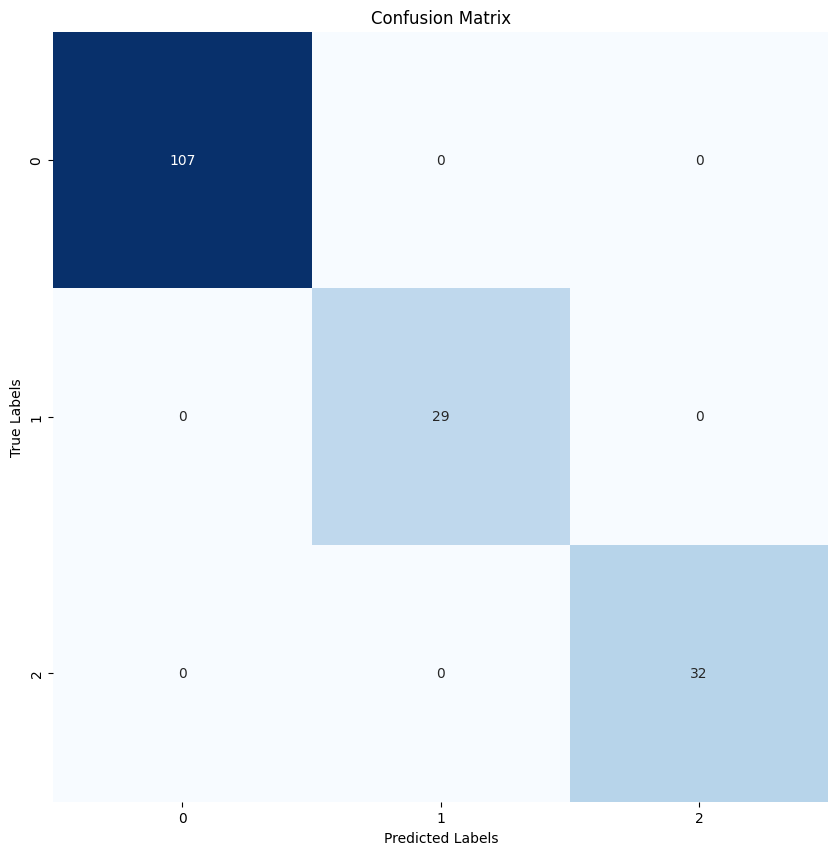

In [10]:
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()